## Clustering jerarquico
### Andrea Julieth Sosa Rodriguez, Tomas Barrios Guevara, Daniel Santiago Riveros Rodriguez

#### **Si tenemos muchos datos y no sabemos a qué grupo pertenecen, ¿cómo los organizamos de manera lógica?** 

Para esto existe el Clustering Jerárquico, una técnica de aprendizaje no supervisado que:

- Agrupa los datos en un árbol de clústeres anidados.

- Permite visualizar relaciones y similitudes entre los datos.

- Nos ayuda a descubrir patrones ocultos en conjuntos grandes de información.

- Agrupa los datos sin imponer un orden lineal dentro de estos.

En otras palabras, el clustering jerárquico es una forma de clasificar sin etiquetas previas, construyendo estructuras que revelan cómo se conectan los datos entre sí.



### Métodos de Clustering Jerárquico

Existen dos enfoques principales en el clustering jerárquico:

🔹 **Aglomerativo (Ascendente / Bottom-Up)**

- Cada dato inicia como un clúster independiente.

- Luego, en cada iteración, se busca el par de clústeres más cercanos (según una métrica de distancia) y se fusionan en un único grupo.

- El proceso continúa hasta que todos los datos quedan en un solo clúster que los contiene a todos.

- Es el método más usado en la práctica, ya que está implementado en librerías como scipy y scikit-learn.

**Ejemplo**
Imagina que tienes muchas piezas de un rompecabezas. Al inicio están todas separadas. En cada paso unes las piezas que encajan mejor, hasta que al final tienes la imagen completa.

**Ventajas ✅**

Sencillo de entender e implementar.

Produce un dendrograma fácil de interpretar.

**Desventajas ❌**

Puede ser costoso en tiempo computacional si hay demasiados datos.

🔹 **Divisivo (Descendente / Top-Down)**

- A diferencia del aglomerativo, este comienza con todos los datos en un único clúster grande.

- En cada paso, se divide ese grupo en subgrupos más pequeños, hasta que cada dato queda separado en su propio clúster.

- Es menos utilizado porque requiere técnicas más complejas para decidir cómo dividir los grupos.

**Ejemplo**
Imagina que ya tienes el rompecabezas armado. En cada paso lo vas separando en secciones más pequeñas, hasta que cada pieza está por separado.

**Ventajas ✅**

Puede ser más eficiente en ciertos contextos, cuando es más fácil detectar grandes diferencias primero.

**Desventajas ❌**

Es más difícil de implementar.

No está tan disponible en librerías estándar.



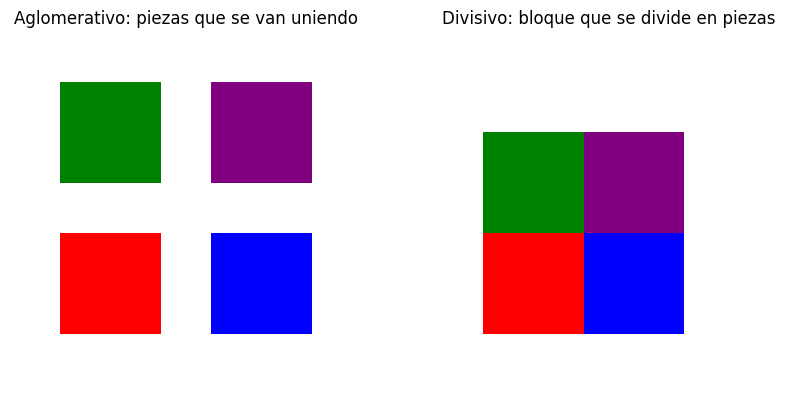

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_puzzle(ax, mode="aglomerativo"):
    # Colores y posiciones de las piezas
    colors = ["red", "blue", "green", "purple"]
    positions = [(0, 0), (1, 0), (0, 1), (1, 1)]
    
    if mode == "aglomerativo":
        # Piezas separadas
        for (x, y), c in zip(positions, colors):
            ax.add_patch(patches.Rectangle((x*1.5, y*1.5), 1, 1, facecolor=c))
        ax.set_title("Aglomerativo: piezas que se van uniendo")
    else:
        # Piezas juntas en bloque
        idx = 0
        for (x, y) in positions:
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=colors[idx]))
            idx += 1
        ax.set_title("Divisivo: bloque que se divide en piezas")
    
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect("equal")
    ax.axis("off")

# Crear figura con las dos versiones
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

draw_puzzle(axes[0], "aglomerativo")
draw_puzzle(axes[1], "divisivo")

plt.show()


## Visualización con Dendrograma

Un dendrograma es la representación gráfica en forma de árbol que muestra:

- El orden en que se fusionan o dividen los clústeres.

- La distancia o similitud entre los datos.

**Un dendrograma también se puede entender como una lista anidada de listas con distintos atributos**

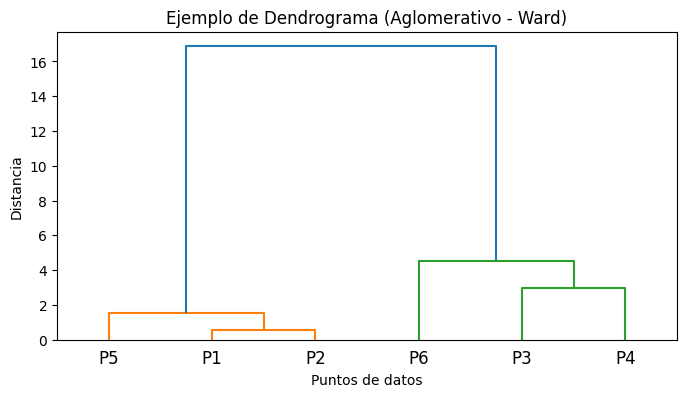

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Datos de ejemplo
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

# Clustering jerárquico aglomerativo con el método 'ward'
Z = linkage(X, method='ward')

# Graficar dendrograma
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Ejemplo de Dendrograma (Aglomerativo - Ward)")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
plt.show()




## Cómo interpretar un dendrograma?

Elementos principales

- Eje X → Los datos u observaciones (por ejemplo: P1, P2, P3…).

- Eje Y → La distancia o disimilitud entre los clústeres cuando se unen.

- Ramas → Cada línea horizontal representa la unión de dos clústeres.

- Altura de la unión → Cuanto más arriba ocurre la unión, menos similares son los grupos que se juntan.


### interpretación del ejemplo

- P1 y P2 se asemejan más entre ellos que con el resto → se unen en una rama a baja altura.

- P3 y P4 también forman un clúster propio, pero a una altura un poco mayor → lo que significa que son menos parecidos entre sí que P1 y P2.

- P5 se une después con P1 y P2 → indicando que está más cerca de ese grupo que de P3 y P4.

- P6 queda aislado hasta el final y se une a gran altura → lo que indica que es el dato más diferente de todos.

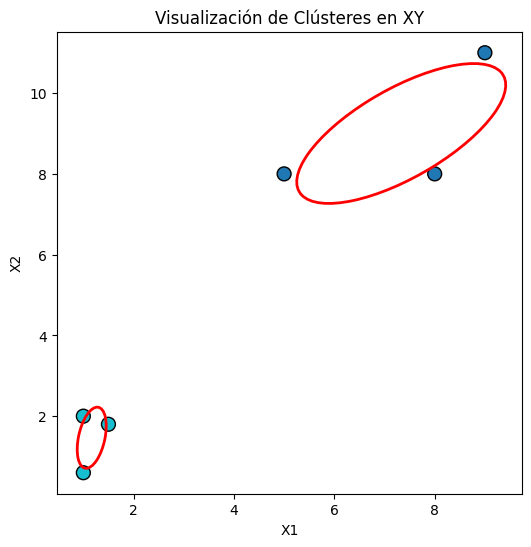

In [11]:
# --- Subplot 2: Visualización en XY con óvalos ---
from sklearn.cluster import AgglomerativeClustering
from matplotlib.patches import Ellipse
import numpy as np

cluster_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = cluster_model.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=100, edgecolor="k")

# Dibujar óvalos alrededor de cada clúster
for cluster_id in np.unique(labels):
    cluster_points = X[labels == cluster_id]
    mean = cluster_points.mean(axis=0)
    cov = np.cov(cluster_points, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='red', facecolor='none', lw=2)
    plt.gca().add_patch(ellipse)

plt.title("Visualización de Clústeres en XY")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


### Cómo funcionan los algoritmos de clustering jerarquico?

Los algoritmos de clustering jerarquico usan lo que es la **matriz de disimilitud** , para decidir si fusionar o dividir los clústeres del grupo de datos, esta matriz tiene dos características importantes:

- Distancia entre dos puntos ( euclidiana )
- Criterio de vinculación o ligamento de clúster


El **método de vinculación** define cómo se mide la distancia entre clústeres en cada paso de la fusión, es importante aclarar que:

- El número de clústers puede variar dependiendo del metodo de vinculación elegido en un mismo conjunto de datos.

- La elección del método de vinculación más apropiado está condicionada por aspectos como la naturaleza de los datos, su densidad, la geometría de los clústeres y la presencia de valores atípicos o ruido en el conjunto.
A continuación, exploramos los métodos más comunes, con ejemplos visuales usando el mismo conjunto de datos.






### 1️. Enlace simple (Single Linkage / mínimo)

- Calcula la distancia entre dos clústeres como la **distancia mínima** entre cualquier par de puntos.  
- Tiende a manejar bien formas de clúster no elípticas, pero sufre el **efecto de encadenamiento**.  

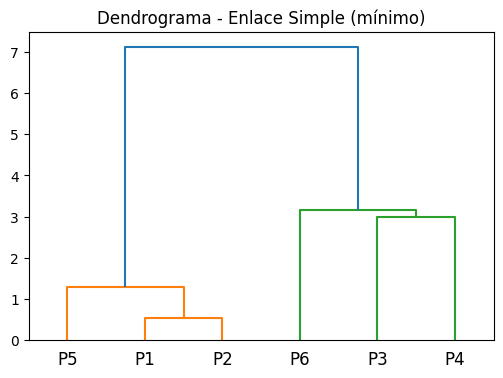

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
X = np.array([[1, 2],[1.5, 1.8],[5, 8],[8, 8],[1, 0.6],[9, 11]])

# Enlace simple
Z_single = linkage(X, method='single')

plt.figure(figsize=(6,4))
dendrogram(Z_single, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Dendrograma - Enlace Simple (mínimo)")
plt.show()

### 2. Enlace completo (Complete Linkage / máximo)

- La distancia entre clústeres se calcula como la distancia máxima entre sus puntos.

- Menos sensible al ruido que el simple, pero tiende a generar clústeres más compactos y esféricos.

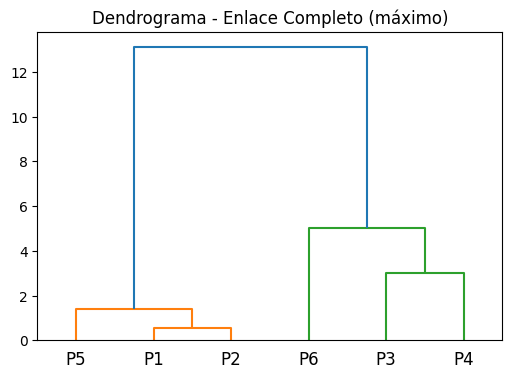

In [2]:
Z_complete = linkage(X, method='complete')

plt.figure(figsize=(6,4))
dendrogram(Z_complete, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Dendrograma - Enlace Completo (máximo)")
plt.show()


### Comparación mínimo y máximo

Enlace máximo:

- Da prioridad a la distancia más lejana → mantiene clústeres compactos y bien separados.

- El último clúster aparece a mayor altura → indica grupos más definidos.

Enlace mínimo:

- Da prioridad a la distancia más corta → une clústeres antes aunque tengan puntos muy alejados.

- El último clúster aparece a menor altura → da la impresión de un único grupo conectado por “cadenas”.

### 3. Método de Ward (Varianza mínima)

- Minimiza el aumento en la suma de cuadrados al fusionar clústeres.

- Produce clústeres compactos y esféricos.

- Es muy usado en la práctica y menos sensible al ruido.

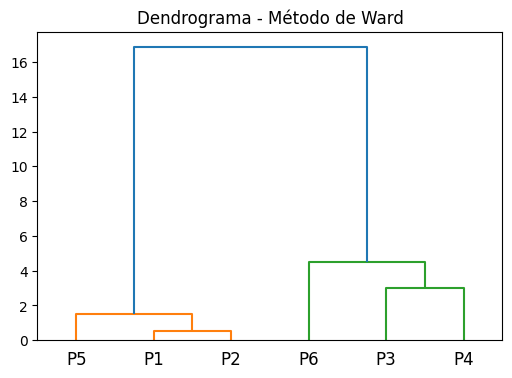

In [4]:
Z_ward = linkage(X, method='ward')

plt.figure(figsize=(6,4))
dendrogram(Z_ward, labels=[f"P{i}" for i in range(1, len(X)+1)])
plt.title("Dendrograma - Método de Ward")
plt.show()


### 4. Plot comparativo entre los 3 métodos de vinculación más importantes

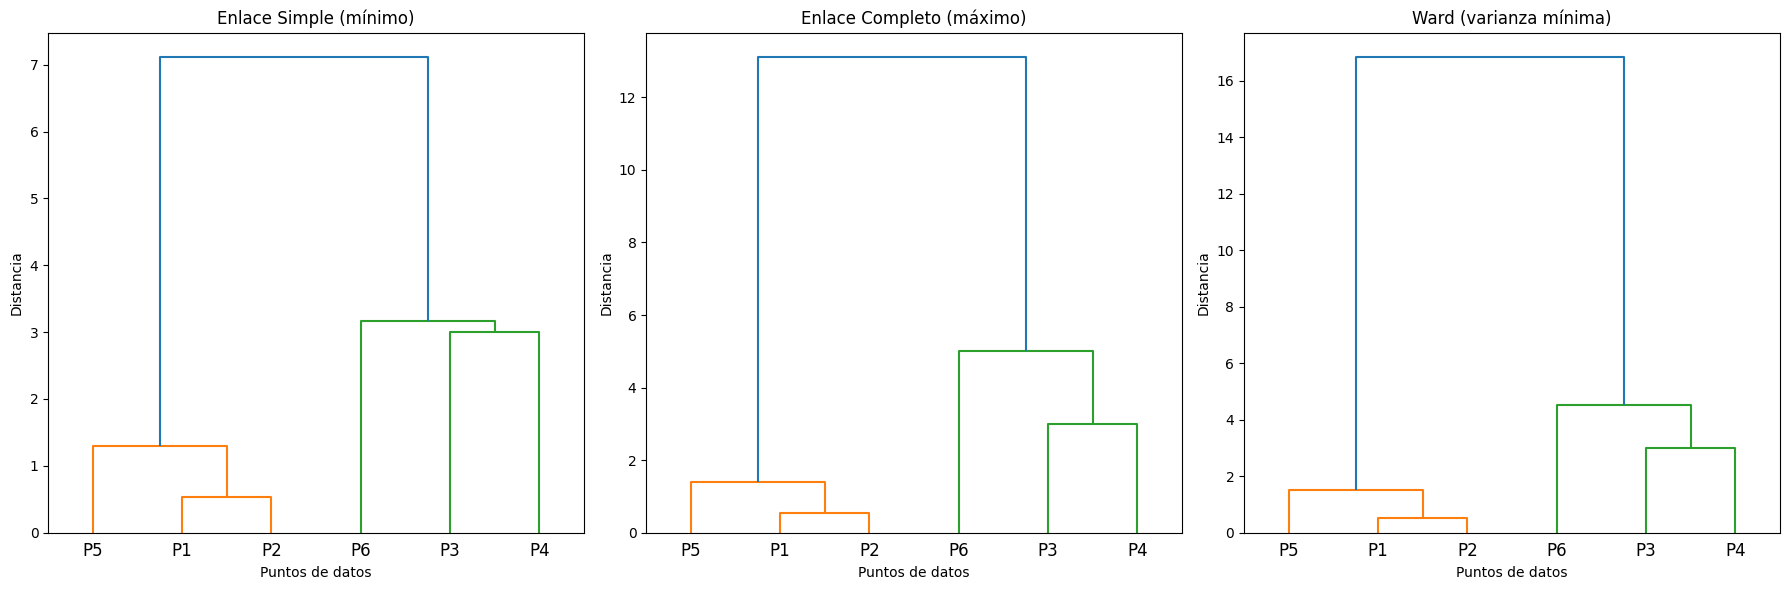

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Datos de ejemplo
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

# Métodos de vinculación
methods = ["single", "complete", "ward"]
titles = ["Enlace Simple (mínimo)", "Enlace Completo (máximo)", "Ward (varianza mínima)"]

# Crear figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, method, title in zip(axes, methods, titles):
    Z = linkage(X, method=method)
    dendrogram(Z, labels=[f"P{i}" for i in range(1, len(X)+1)], ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Puntos de datos")
    ax.set_ylabel("Distancia")

plt.tight_layout()
plt.show()
